# **Introduction to Deep Learning**
## Assignment 1: building multi-layer perceptrons (MLPs), convolutional neural networks (CNNs) with Tensorflow/Keras

## *Harshad Sansanwal, India Wagg and Rachel Brodkin*

## Task 1: Learn the basics of Keras API for TensorFlow

In [1]:
# import TensorFlow
import tensorflow as tf

#Check the version of TensorFlow you are using
#print(tf.__version__)
#print(tf.config.list_physical_devices('GPU'))


from __future__ import print_function

import keras
print(keras.__version__)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

3.4.1


In [ ]:
# load the fashion mnist data

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

# every image is represented as a 28 × 28 array
# the dataset contains 2D (grayscale) images of size 28x28, split into 10 categories; 60,000 images for training and 10,000 for testing,

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
# Create a validation set
# Since we are going to train the neural network using Gradient Descent, we must scale the input features.
# Scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# provide the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Task 1 (a) Apply Multi-layer Perceptron

In [ ]:
# Creating the model using the Sequential API
# Classification MLP with two hidden layers:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
# Training and evaluating the model

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5672 - loss: 1.4547 - val_accuracy: 0.7648 - val_loss: 0.7150
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7720 - loss: 0.6893 - val_accuracy: 0.8054 - val_loss: 0.5898
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8062 - loss: 0.5810 - val_accuracy: 0.8104 - val_loss: 0.5546
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8240 - loss: 0.5246 - val_accuracy: 0.8262 - val_loss: 0.5064
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8289 - loss: 0.4981 - val_accuracy: 0.8416 - val_loss: 0.4775
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8348 - loss: 0.4750 - val_accuracy: 0.8478 - val_loss: 0.4521
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8427 - loss: 0.4525 - val_accuracy: 0.8500 - val_loss: 0.4369
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8431 - loss: 0.4496 - val_accuracy: 0.

## Results

Test loss: 71.06719970703125

Test accuracy: 0.8241000175476074

In [ ]:
model.save("sequential_basic_model.h5")

## MLP: Changing Regularization techniques

In [ ]:
from tensorflow.keras import regularizers

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu",
                             kernel_initializer="he_normal",
                             kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.5))  # Dropout with 50% rate
model.add(keras.layers.Dense(100, activation="relu",
                             kernel_initializer="he_normal",
                             kernel_regularizer=regularizers.l2(0.001)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

In [ ]:
# Training and evaluating the model

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3417 - loss: 2.6889 - val_accuracy: 0.7214 - val_loss: 1.6496
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6139 - loss: 1.8679 - val_accuracy: 0.7564 - val_loss: 1.4883
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6768 - loss: 1.6883 - val_accuracy: 0.7774 - val_loss: 1.4143
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7038 - loss: 1.5976 - val_accuracy: 0.7950 - val_loss: 1.3553
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7260 - loss: 1.5224 - val_accuracy: 0.8070 - val_loss: 1.3142
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7429 - loss: 1.4728 - val_accuracy: 0.8138 - val_loss: 1.2748
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7533 - loss: 1.4291 - val_accuracy: 0.8204 - val_loss: 1.2433
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7650 - loss: 1.3890 - val_accuracy: 0.

## Results

Test loss: 62.11174392700195

Test accuracy: 0.8080999851226807

In [ ]:
model.save("sequential_Regularization_model.h5")

# CIFAR10 Data

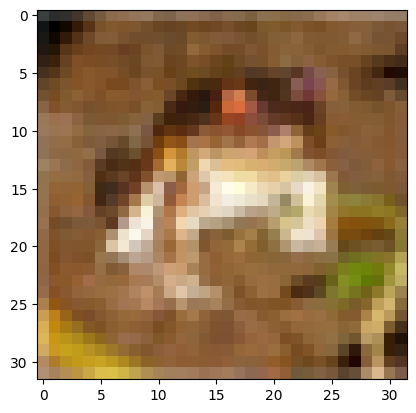

In [ ]:
# Loads the CIFAR10 dataset.
# This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories

cifar10 = keras.datasets.cifar10


(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# View first image
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

## Use the first model on the cifar10 data

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential()

# Update input shape to match CIFAR-10 dataset
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more layers as necessary
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))  # CIFAR-10 has 10 categories

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,200,842 (16.02 MB)

 Trainable params: 4,200,842 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, Y_train,
                    batch_size=64,  # define batch size
                    epochs=10,      # define number of epochs
                    verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2735 - loss: 77.6335
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5130 - loss: 1.4218
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5762 - loss: 1.2210
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6242 - loss: 1.0810
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6584 - loss: 0.9744
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6998 - loss: 0.8621
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7293 - loss: 0.7761
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7548 - loss: 0.7063
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7844 - loss: 0.6176
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8051 - loss: 0.5635
Test loss: 1.9196841716766357
Test accuracy: 0.5342000126838684


## Results

Test loss: 1.9196841716766357

Test accuracy: 0.5342000126838684

#### India's part: Trying and testing Task 1

In [ ]:
import keras
# import Fashion MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# creating a validation set
# 6000 because 10% of dataset
X_valid, X_train = X_train_full[:6000] / 255.0, X_train_full[6000:] / 255.0
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

# creating class names tg
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# MLP with two hidden layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu" ))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(60000, 28, 28)

# Classification

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images_path =
labels_path =

# Multi-head model

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
images_path = '/content/drive/My Drive/Colab Notebooks/images.npy'
labels_path = '/content/drive/My Drive/Colab Notebooks/labels.npy'


In [3]:
import numpy as np

# Load the data
images = np.load(images_path)
labels = np.load(labels_path)

# Check the data (optional)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (18000, 150, 150)
Labels shape: (18000, 2)


We must define the times in terms of a class representing each and every possible time -  all 720 different labels

In [4]:
labels_class = labels[:, 0] * 60 + labels[:, 1]

In [5]:
# Set a random seed for reproducibility
np.random.seed(123)

# Generate a permutation of indices
indices = np.random.permutation(len(images))

# Shuffle the images and labels
shuffled_images = images[indices]
shuffled_labels = labels_class[indices]


In [6]:
from sklearn.model_selection import train_test_split

# Assuming your images and labels are stored in variables named `X` and `y`
# X = images (features), y = labels (target)

# Step 1: Split off the test set (10% of data)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images, labels_class, test_size=0.1, random_state=123, shuffle=True
)

# Step 2: Split the remaining data into training (80%) and validation (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1, random_state=123, shuffle=True
)

# Print shapes to verify
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (14580, 150, 150) (14580,)
Validation set: (1620, 150, 150) (1620,)
Test set: (1800, 150, 150) (1800,)


Normalize the data

In [7]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# must add the channel (becuase it is grayscale = use 1 ) so that its (number of values, height, width, channel)
X_train = X_train.reshape(-1, 150, 150, 1)
X_val = X_val.reshape(-1, 150, 150, 1)
X_test = X_test.reshape(-1, 150, 150, 1)



Standardize image data:

Scaling to [0, 1]: Divide each pixel by 255 (since pixel values range from 0 to 255).
Z-score normalization: Subtract the mean and divide by the standard deviation for each pixel.

# Train a CNN model


In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(720, activation='softmax')  # There are 720 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are not one-hot encoded
              metrics=['accuracy'])

# Convert target labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=720) # Apply to_categorical
y_val = to_categorical(y_val, num_classes=720)     # Apply to_categorical
y_test = to_categorical(y_test, num_classes=720)   # Apply to_categorical


# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.0011 - loss: 6.5846 - val_accuracy: 0.0000e+00 - val_loss: 6.5844
Epoch 2/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 926s 2s/step - accuracy: 0.0013 - loss: 6.5794 - val_accuracy: 0.0000e+00 - val_loss: 6.5880
Epoch 3/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - accuracy: 0.0012 - loss: 6.5784 - val_accuracy: 0.0000e+00 - val_loss: 6.5912
Epoch 4/20
456/456 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 9.2103e-04 - loss: 6.5778 - val_accuracy: 0.0000e+00 - val_loss: 6.5944
Epoch 5/20
244/456 ━━━━━━━━━━━━━━━━━━━━ 5:41 2s/step - accuracy: 0.0028 - loss: 6.5765

In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [18]:

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Regularization to reduce overfitting

    layers.Dense(720, activation='softmax')  # Output layer for 720 classes
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Set up EarlyStopping and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                   callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest accuracy:", test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.0016 - loss: 6.7759 - val_accuracy: 6.1728e-04 - val_loss: 6.6232
Epoch 2/15
456/456 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 8.9416e-04 - loss: 6.5828 - val_accuracy: 0.0000e+00 - val_loss: 6.5801
Epoch 3/15


KeyboardInterrupt: 